In [124]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import mapclassify as mc




In [128]:
#read data files
fl_1 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_1.csv', index_col='DATE',parse_dates=True)
fl_2 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_2.csv', index_col='DATE',parse_dates=True)
fl_3 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_3.csv', index_col='DATE',parse_dates=True)
fl_4 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_4.csv', index_col='DATE',parse_dates=True)
fl_5 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_5.csv', index_col='DATE',parse_dates=True)
fl_6 = pd.read_csv('Resources/Unemployment Data/Florida_Unemployment_6.csv', index_col='DATE',parse_dates=True)

#concat files to create Florida Unemployment df
fl_unemployment = pd.concat([fl_1,fl_2,fl_3,fl_4,fl_5,fl_6], axis=1, join='inner')

#rename columns
fl_unemployment.columns = ['Alachua','Baker','Bay','Bradford','Brevard','Broward','Calhoun','Charlotte','Citrus','Clay','Collier','Columbia'
                                ,'DeSoto','Dixie','Duval','Escambia','Flagler','Franklin','Gadsden','Gilchrist','Glades','Gulf','Hamilton','Hardee'
                                ,'Hendry','Hernando','Highlands','Hillsborough','Holmes','Indian River','Jackson','Jefferson','Lafayette','Lake','Lee','Leon'
                                ,'Levy','Liberty','Madison','Manatee','Marion','Martin','Miami-Dade','Monroe','Nassau','Okaloosa','Okeechobee','Orange'
                                ,'Osceola','Palm Beach','Pasco','Pinellas','Polk','Putnam','Santa Rosa','Sarasota','Seminole','St. Johns','St. Lucie','Sumter'
                                ,'Suwawnee','Taylor','Union','Volusia','Wakulla','Walton','Washington' ]

#preview data
display(fl_unemployment.head())
display(fl_unemployment.tail())


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.6,3.8,5.9,3.8,3.8,3.6,5.3,4.3,5.8,3.7,...,3.3,4.6,5.5,4.0,4.4,3.6,4.1,3.5,3.6,4.7
2019-02-01,3.0,3.2,4.8,3.3,3.4,3.2,4.5,3.8,5.1,3.2,...,2.8,4.1,5.0,3.5,3.8,3.0,3.6,2.9,3.1,3.9
2019-03-01,3.0,3.2,4.4,3.3,3.3,3.1,4.3,3.8,4.9,3.1,...,2.8,3.9,5.0,3.5,3.6,3.0,3.5,2.9,3.0,3.6
2019-04-01,2.6,2.9,3.7,2.9,3.0,2.8,3.7,3.4,4.5,2.8,...,2.5,3.6,4.6,3.1,3.4,2.7,3.2,2.7,2.7,3.2
2019-05-01,2.8,3.1,3.7,3.1,3.1,3.0,3.6,3.6,4.8,2.9,...,2.5,3.9,4.7,3.2,3.4,2.8,3.4,2.9,2.7,3.2


,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2021-08-01,4.0,4.0,3.9,4.4,4.2,4.9,4.8,4.8,6.1,3.7,...,3.3,5.2,5.9,4.8,5.2,4.1,4.7,3.5,3.7,4.7
2021-09-01,3.5,3.6,3.5,4.0,3.8,4.5,4.5,4.3,5.4,3.4,...,2.9,4.7,5.3,4.5,4.6,3.6,4.3,3.0,3.4,4.2
2021-10-01,3.4,3.6,3.4,3.8,3.6,4.1,4.5,4.0,5.0,3.2,...,2.8,4.4,4.8,4.2,4.4,3.4,4.1,2.9,3.2,4.0
2021-11-01,3.1,3.3,3.3,3.9,3.5,3.9,4.1,3.9,5.0,3.0,...,2.7,4.2,4.8,3.9,4.4,3.2,3.9,2.8,3.1,3.8
2021-12-01,2.8,2.9,3.1,3.4,3.0,3.3,3.6,3.4,4.4,2.7,...,2.3,3.6,4.2,3.4,4.0,2.7,3.4,2.5,2.7,3.5


In [129]:
fl_unemployment_yearly = fl_unemployment.groupby(fl_unemployment.index.year).mean()
fl_unemployment_yearly.head()

,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwawnee,Taylor,Union,Volusia,Wakulla,Walton,Washington
DATE,,,,,,,,,,,,,,,,,,,,,
2019,3.008333,3.175000,3.808333,3.316667,3.266667,3.10,4.058333,3.766667,4.958333,3.108333,...,2.708333,4.033333,4.808333,3.458333,3.683333,3.058333,3.533333,2.958333,2.933333,3.550000
2020,5.725000,5.341667,6.341667,6.341667,7.041667,9.40,5.450000,7.775000,8.925000,5.708333,...,5.491667,8.191667,8.375000,6.025000,6.741667,5.016667,8.100000,4.750000,6.166667,6.166667
2021,3.833333,3.825000,3.983333,4.275000,4.158333,4.95,4.666667,4.491667,5.800000,3.633333,...,3.125000,5.008333,5.450000,4.625000,5.200000,3.883333,4.708333,3.283333,3.633333,4.600000


In [130]:
#pivot data to then join with gdp dataset
fl_unemployment_yearly = fl_unemployment_yearly.transpose()

#rename index
fl_unemployment_yearly = fl_unemployment_yearly.rename_axis(None,axis=1)


In [131]:
#get column names to verify data transposed as expected
display(fl_unemployment_yearly.keys())
display(fl_unemployment_yearly.head())


Index([2019, 2020, 2021], dtype='int32')

,2019,2020,2021
Alachua,3.008333,5.725000,3.833333
Baker,3.175000,5.341667,3.825000
Bay,3.808333,6.341667,3.983333
Bradford,3.316667,6.341667,4.275000
Brevard,3.266667,7.041667,4.158333


In [132]:
#reset index 
fl_unemployment_yearly.reset_index(inplace=True)
fl_unemployment_yearly.head()


,index,2019,2020,2021
0,Alachua,3.008333,5.725000,3.833333
1,Baker,3.175000,5.341667,3.825000
2,Bay,3.808333,6.341667,3.983333
3,Bradford,3.316667,6.341667,4.275000
4,Brevard,3.266667,7.041667,4.158333


In [133]:
#rename columns
fl_unemployment_yearly.columns = ['County','2019_index','2020_index','2021_index']
fl_unemployment_yearly.head()

,County,2019_index,2020_index,2021_index
0,Alachua,3.008333,5.725000,3.833333
1,Baker,3.175000,5.341667,3.825000
2,Bay,3.808333,6.341667,3.983333
3,Bradford,3.316667,6.341667,4.275000
4,Brevard,3.266667,7.041667,4.158333


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


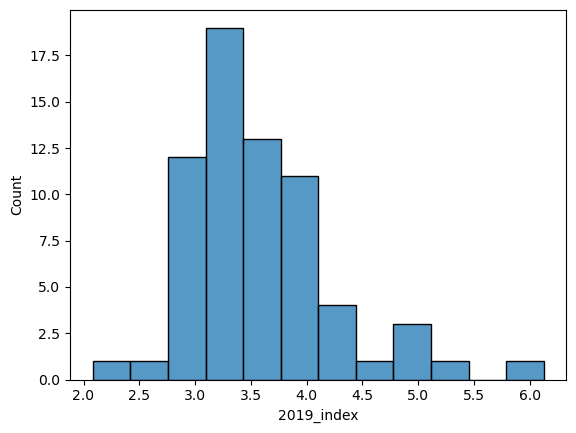

In [134]:
#show the distribution of unemployment index for 2019
sns.histplot(fl_unemployment_yearly['2019_index'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


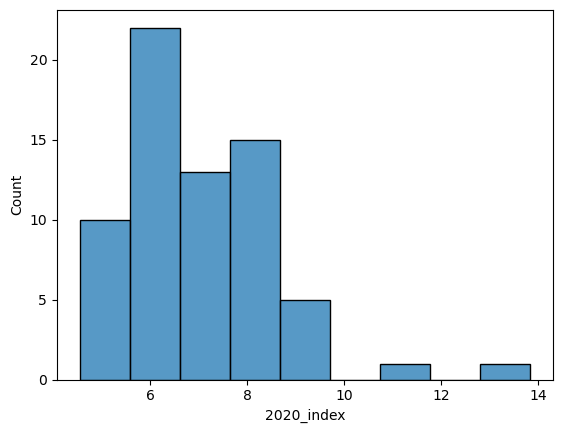

In [135]:
#show the distribution of unemployment index for 2020
sns.histplot(fl_unemployment_yearly['2020_index'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


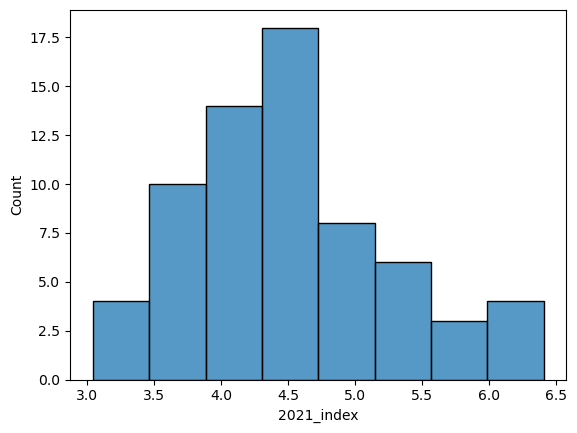

In [136]:
#show the distribution of unemployment index for 2021
sns.histplot(fl_unemployment_yearly['2021_index'])
plt.show()

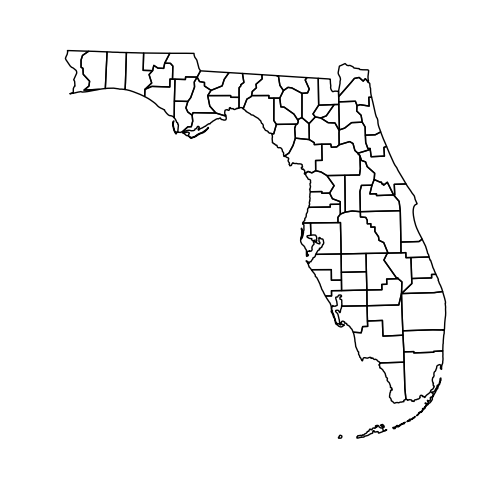

In [137]:
# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

# Make sure the "id" column is an integer
geoData.id = geoData['id'].astype(int)

# filter data to Florida
florida = geoData.loc[geoData['STATE']=='12']

# Basic plot with just county outlines
gplt.polyplot(
    florida,
    projection=gcrs.AlbersEqualArea()
)
plt.show()


In [147]:
#merge spatial and numerical data
full_df = florida.merge(fl_unemployment_yearly,left_on=['NAME'],right_on=['County'])

#round unemployment index to two decimal places
full_df = full_df.round(1)

#show first five rows
full_df.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,County,2019_index,2020_index,2021_index
0,12083,0500000US12083,12,083,Marion,County,1584.5,"POLYGON ((-82.31170 28.96039, -82.42700 29.021...",Marion,3.9,7.5,5.0
1,12087,0500000US12087,12,087,Monroe,County,983.3,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ...",Monroe,2.1,8.4,3.0
2,12095,0500000US12095,12,095,Orange,County,903.4,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",Orange,3.0,11.2,5.2
3,12111,0500000US12111,12,111,St. Lucie,County,571.9,"POLYGON ((-80.67786 27.20599, -80.67861 27.448...",St. Lucie,4.0,8.2,5.0
4,12119,0500000US12119,12,119,Sumter,County,546.9,"POLYGON ((-81.95419 28.96005, -81.95358 28.820...",Sumter,4.8,8.4,5.4


In [ ]:
choropleth(df, projection, hue, cmap, norm, scheme, legend, legend_kwargs, legend_labels, legend_values, extent, figsize, ax, **kwargs)
    993         return ax

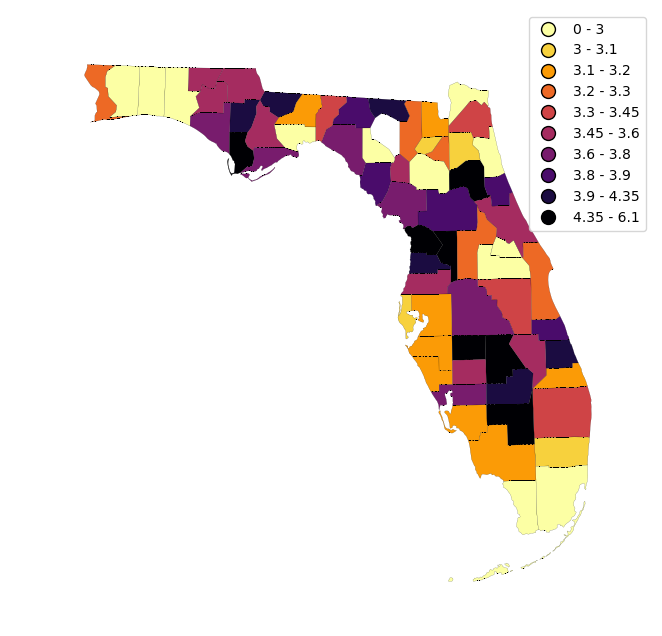

In [158]:
#color mapping with 10 colors
scheme = mc.Quantiles(full_df['2019_index'], k=10)

# Map
gplt.choropleth(
    full_df,
    projection=gcrs.AlbersEqualArea(),
    hue='2019_index',
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8),
    legend=True
)

plt.show()

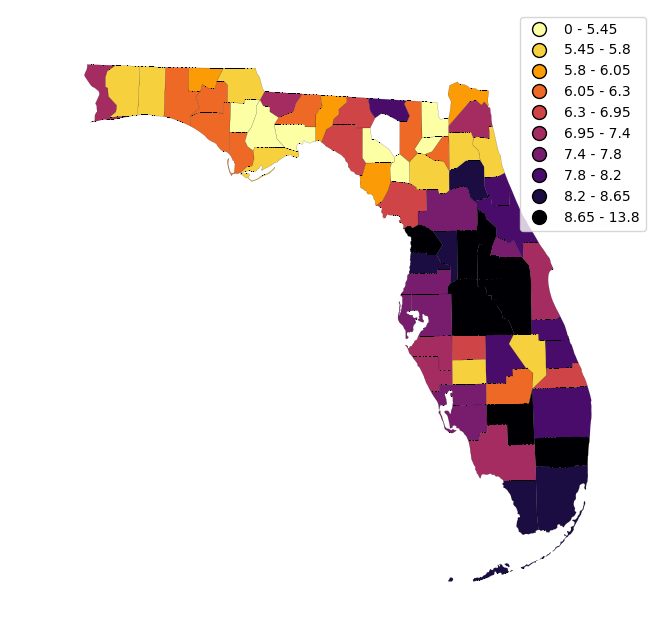

In [161]:
#color mapping with 10 colors
scheme = mc.Quantiles(full_df['2020_index'], k=10)

# Map
gplt.choropleth(
    full_df,
    projection=gcrs.AlbersEqualArea(),
    hue='2020_index',
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8),
    legend=True
)

plt.show()

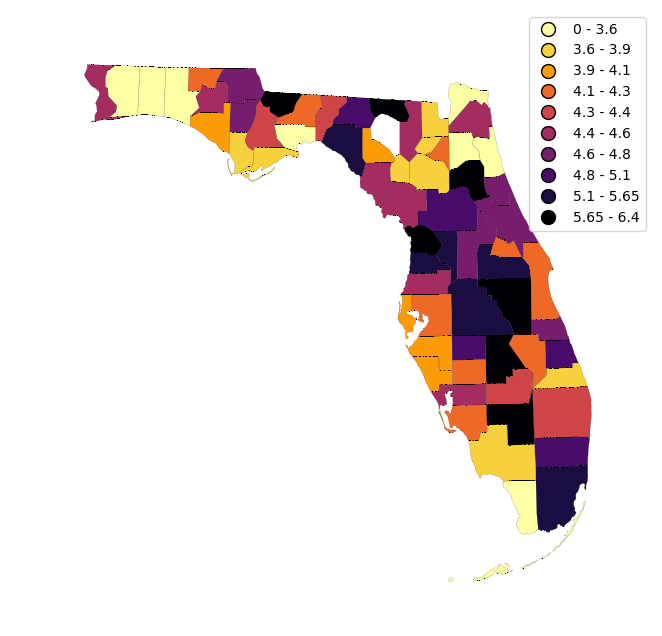

In [162]:
#color mapping with 10 colors
scheme = mc.Quantiles(full_df['2021_index'], k=10)

# Map
gplt.choropleth(
    full_df,
    projection=gcrs.AlbersEqualArea(),
    hue='2021_index',
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8),
    legend=True
)

plt.show()